In [19]:
from hdr_processing.HDR import HDR
import cv2
import matplotlib.pyplot as plt
import sys
import objgraph

In [20]:
hdr = HDR("master_room_photos")

size img_list:  108000432
max of images: 255
size img_list_pil:  168
size calibrate_debevec_obj:  32
size calibrate_robertson_obj:  32
size merge_debevec_obj:  32
size merge_robertson_obj:  32
size merge_mertens_obj:  32
size tonemap_reinhard:  32


Images aligned


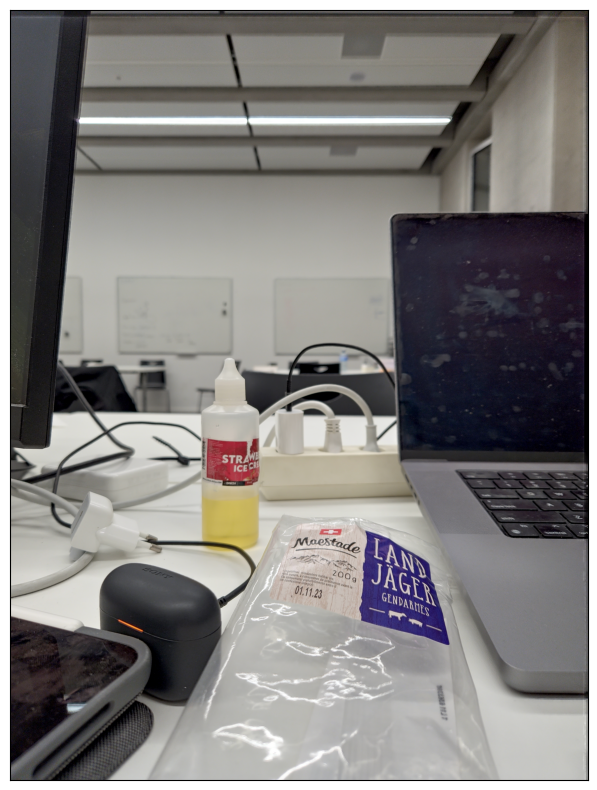

In [21]:
hdr.extract_exif()
hdr.extract_exposure_times()
hdr.align_images()
hdr.process_exposure_fusion()
hdr.show_fusion_image()

Calibrated


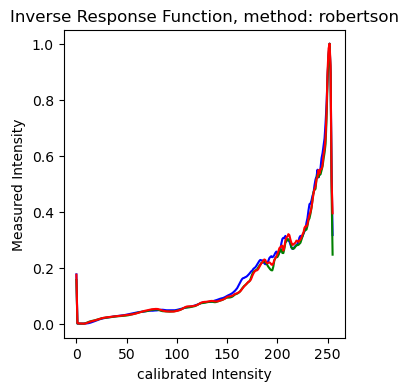

In [22]:
hdr.calibrate()
hdr.plot_camera_inv_response("robertson")

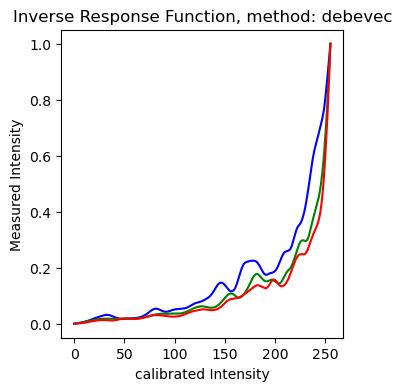

In [23]:
hdr.plot_camera_inv_response("debevec")

Merged


([], [])

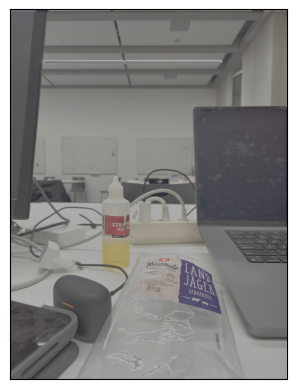

In [24]:
hdr.merge("robertson")
image_processed=hdr.process_tone_map_reinhard("robertson")
rgb = cv2.cvtColor(image_processed.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])

([], [])

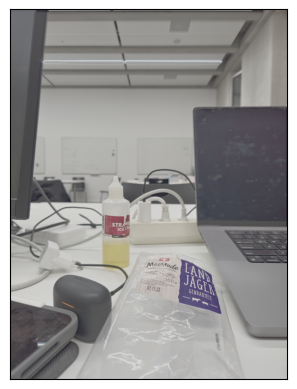

In [25]:
image_processed=hdr.process_tone_map_reinhard("debevec")
rgb = cv2.cvtColor(image_processed.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])

In [26]:
from types import ModuleType, FunctionType
from gc import get_referents
BLACKLIST = type, ModuleType, FunctionType


def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

In [27]:


objgraph.show_refs([hdr], filename='memory_usage.png')
print("memory list images in list: ", sys.getsizeof(hdr.img_list[0]))
memory_size = getsize(hdr)
print(f"Memory usage of hdr: {memory_size} bytes")
print(f"Memory usage of hdr: {memory_size / (1000 * 1000)} megabytes")


Graph written to /var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/objgraph-65u04ftt.dot (41 nodes)
Image generated as memory_usage.png
memory list images in list:  36000144
Memory usage of hdr: 684022118 bytes
Memory usage of hdr: 684.022118 megabytes
